In [41]:
library(forecast)
library(ggplot2)
library(Rcpp)

# Scenario 1 : NID Demand

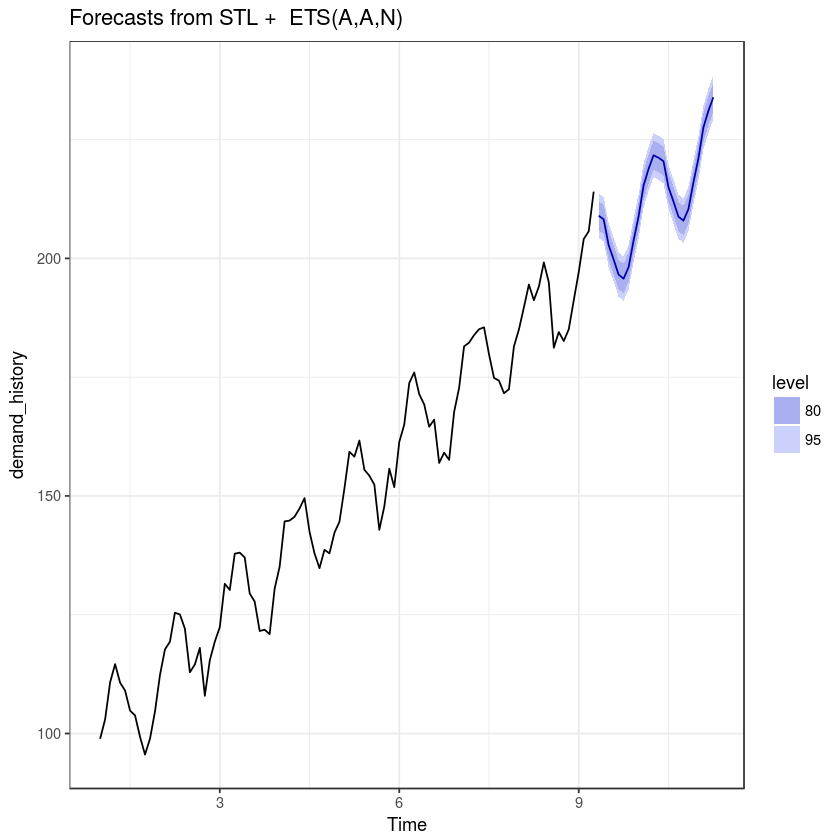

In [58]:
set.seed(1000)
demand_history <- ts(rnorm(100, 100:200 + 10*sin((0:100)*2*pi/12), 2.5), frequency=12)
demand_model <- stl(demand_history, s.window="periodic")
demand_forecast <- forecast(demand_model, h=12*2)
autoplot(demand_forecast) + theme_bw()

In [93]:
demand_forecast_mean <- demand_forecast$mean
demand_forecast_std <- (demand_forecast_mean - demand_forecast$lower[, "95%"])/qnorm(.975)

[1] 208.8033

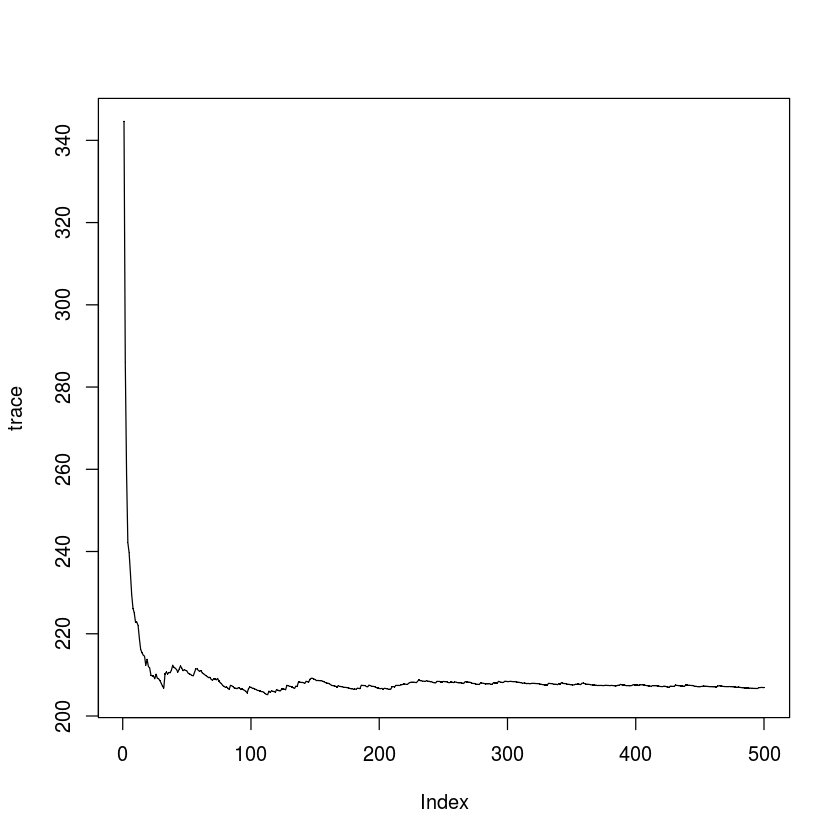

In [84]:
model <- Arima(history, order=c(0, 0, 0), include.drift=T)
q <- 100
h <- rep(1, 100)
p <- rep(5, 100)
trace <- c()
for (i in 1:500) {
    demand <- simulate(model, nsim=100)
    q <- q - (1/(i+1))*pr_root(q, 0, demand, h, p)
    trace <- c(trace, q)
}

mean(trace)
plot(trace, pch=".")
lines(trace)

In [2]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())